In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
from folium.plugins import HeatMap 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.metrics import silhouette_score
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
# import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## Karate 데이터
가라테 클럽의 회원들 간의 친구 관계를 연구하기 위해 Zachary에 의해 수집. <br>
34명의 가라테 클럽 회원을 노드로 나타내고, 친구 관계를 엣지로 

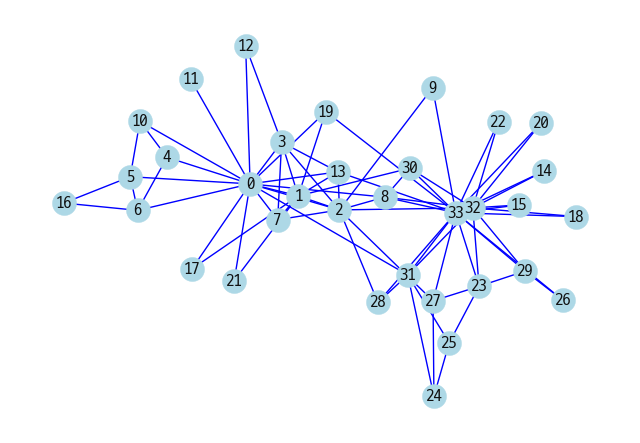

In [12]:
G = nx.karate_club_graph()

plt.axis(False)     # False 대신 off 가능
nx.draw_networkx(G, with_labels=True, font_family='D2CodingLigature Nerd Font', node_color='lightblue', edge_color='blue')

In [7]:
G.degree()  # 노드별 (노드, 차수)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [8]:
G.degree(16)    # 16번 노드의 엣지

2

In [17]:
d = [n for n, d in G.degree() if d==4]
print(f"차수가 4인 노드 : {d}")

차수가 4인 노드 : [5, 6, 7, 27, 29, 30]


In [16]:
print('노드의 개수: %d' % G.number_of_nodes())
print('엣지의 개수: %d' % G.number_of_edges())
print('평균 차수: %.1f' % np.mean([d for n, d in G.degree()]))

print(f'노드의 개수: {G.number_of_nodes()}' )
print(f'엣지의 개수: {G.number_of_edges()}' )
print(f'평균 차수: {np.mean([d for n, d in G.degree()]):.1f}' )

노드의 개수: 34
엣지의 개수: 78
평균 차수: 4.6
노드의 개수: 34
엣지의 개수: 78
평균 차수: 4.6


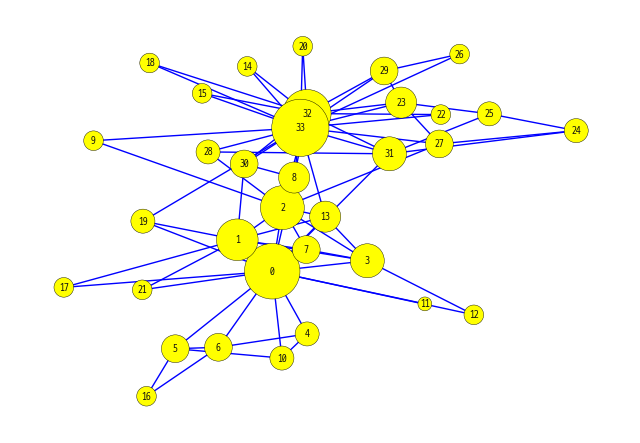

In [ ]:
degree = [d for n, d in G.degree()]
plt.axis('off')

nx.draw_networkx(G, with_labels=True, node_size=[n*100 for n in degree], font_family='D2CodingLigature Nerd Font',
                  node_color='yellow', edge_color='blue', edgecolors="black", font_size=7)  # degecolors: 원둘레 색상